<img src="./raugm23.jpg" width="300px" align="right">

# MODELACIÓN DE SISTEMAS TERRESTRES USANDO LA PLATAFORMA MACTI PARA APOYAR LA ENSEÑANZA DE MATEMÁTICAS.
**Dr. Luis Miguel de la Cruz Salas**<br>
Instituto de Geofísica, UNAM

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">MACTI NOTES</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 


# Conducción de calor

**Objetivo.**
Resolver numéricamente la ecuación de conducción de calor no estacionaria usando diferencias finitas y un método explicito.


<a name='1'></a>
## Introducción

<img src="./ModMat.jpg" width="500px" align="right">

**Modelación Matemática y Computacional.**

Cuatro modelos:
1. Modelo conceptual.
2. Modelo Matemático.
3. Modelo Numérico.
4. Modelo computacional.


<a name='2'></a>
## Modelo conceptual.

<img src="./calor01.jpg" width="400px" align="right">

En este ejercicio vamos a aproximar la temperatura de una placa rectangular de metal con conductividad $\kappa$ homogénea e isotrópica. Para ello, usaremos la [Ley de Fourier de conducción de calor](https://es.wikipedia.org/wiki/Conducci%C3%B3n_de_calor#Ley_Fourier).

Supondremos que se aplican temperaturas constantes en todas las paredes $T_0$. En la sección $Ly_2$ de la pared inferior, véase figura, se aplica una temperatura más alta, $T_h$ simulando un calentamiento.La longitud horizontal $Lx$ es el doble que la horizontal $Ly$.

Trataremos el problema de manera adimensional de tal manera que tenemos los siguientes datos: $\kappa = 1.0$, $T_0 = 0$ y $T_h = 20$. 

<a name='3'></a>
## Modelo matemático.

[Jean-Baptiste Joseph Fourier](https://www.elmostrador.cl/cultura/2018/07/17/joseph-fourier-el-matematico-reclutado-por-napoleon-que-disparo-su-propia-revolucion-cuando-se-enamoro-del-calor/) fue un matemático y físico francés que ejerció una fuerte influencia en la ciencia a través de su trabajo *Théorie analytique de la chaleur*. En este trabajo mostró que es posible analizar la conducción de calor en cuerpos sólidos en términos de series matemáticas infinitas, las cuales ahora llevan su nombre: *Series de Fourier*. Fourier comenzó su trabajo en 1807, en Grenoble, y lo completó en París en 1822. Su trabajo le permitió expresar la conducción de calor en objetos bidimensionales (hojas muy delgadas de algún material) en términos de la siguiente ecuación diferencial:

$$
\dfrac{\partial T}{ \partial t} = \kappa \left(\dfrac{\partial^2 T}{ \partial x^2} + \dfrac{\partial^2 T}{ \partial y^2}\right) \tag{1}
$$

donde $T$ representa la temperatura en un instante de tiempo $t$ y en un punto $(x,y)$ del plano Cartesiano y $\kappa$ es la conductividad del material.

Para completar la ecuación $(1)$ con condiciones iniciales y de frontera.

**Condición inicial:**
$$
T(t=0, x, y) = 0 \qquad \text{para} \quad (x,y) \in [0,Lx] \times [0,Ly]
$$

**Condiciones de frontera:**
$$
\begin{eqnarray}
T(t, x=0, y) & = & T_0 \qquad \text{para} \quad y [0,Ly]\\
T(t, x=Lx, y) & = & T_0 \qquad \text{para} \quad y [0,Ly]\\
T(t, x, y=0) & = & T_0 \qquad \text{para} \quad x \in Ly_1 \cup Ly_3\\
T(t, x, y=0) & = & T_h \qquad \text{para} \quad x \in Ly_2 \\
T(t, x, y=Ly) & = & T_0 \qquad \text{para} \quad y [0,Ly]\\
\end{eqnarray}
$$

para $t = 0, T_{max}$

<a name='4'></a>
## Modelo numérico.

<img src="../utils/figs/malla2D_DF.png"  hspace="5" vspace="5" style="float: right;"/>

En ciertas condiciones existen soluciones analíticas de la ecuación $(1)$, sin embargo, también es posible aproximar una solución usando el método numérico de diferencias finitas. 

El primer paso es discretizar el dominio como se ve en la figura.

El segundo paso es transformar la ecuación $(1)$ en un conjunto de ecuaciones discretas, una para cada nodo donde se desea calcular la solución. Usando diferencias finitas y una fórmula explícita es posible escribir la forma discreta de $(1)$ como sigue:

$$
T_{i,j}^{n+1} = T_{i,j}^n + \dfrac{h_t\kappa}{h^2} 
\left(T_{i+1,j}^n + T_{i-1,j}^n + T_{i,j+1}^n + T_{i,j-1}^n - 4T_{i,j}^n\right) \tag{2}
$$

donde:
- $T_{i,j}^n = T(t_n, x_i, y_j)$
- $T_{i+1,j}^n = T(t_n, x_{i+1}, y_j)$, 
- $T_{i-1,j}^n = T(t_n, x_{i-1}, y_j)$, 
- $T_{i,j+1}^n = T(t_n, x_i, y_{j+1})$, 
- $T_{i,j-1}^n = T(t_n, x_i, y_{j-1})$. 
- El superíndice indica el instante de tiempo en el que se realiza el cálculo. 
- Se cumple que $t_{n+1} = t_n + h_t$, con $h_t$ el paso de tiempo.
- En este ejemplo $h_x = h_y$.



<a name='5'></a>
## Modelo computacional.

Usando la aproximación descrita en la sección anterior, vamos a realizar un ejemplo de conducción de calor. Para ello necesitamos conocer las herramientas de [Numpy](https://numpy.org) y [Matplotlib](https://matplotlib.org). Un tutorial de Numpy lo puedes ver <a href="../Tutoriales/T1_Numpy.ipynb">aquí</a> y uno de Matplotlib <a href="../Tutoriales/T2_Matplotlib_basico.ipynb">por acá</a>.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

print('Python', sys.version)
print(np.__name__, np.__version__)
print(plt.matplotlib.__name__, plt.matplotlib.__version__)

Python 3.11.5 | packaged by conda-forge | (main, Aug 27 2023, 03:34:09) [GCC 12.3.0]
numpy 1.25.2
matplotlib 3.7.2


<a name='5-1'></a>
### Algoritmo 1.

Los pasos a seguir son los siguientes.

**1. Definir los parámetros físicos y numéricos del problema:**

In [2]:
# Parámetros físicos
𝜅 = 1.0  # Conductividad
Lx = 2.0  # Longitud del dominio en dirección x
Ly = 1.0  # Longitud del dominio en dirección y
T0 = 0
Th = 20

# Parámetros numéricos
Nx = 29 # Número de incógnitas en dirección x
Ny = 14 # Número de incógnitas en dirección y
h = Lx / (Nx+1) # Espaciamiento entre los puntos de la rejilla
ht = 0.0001     # Paso de tiempo
N = (Nx + 2)* (Ny + 2) # Número total de puntos en la rejilla

In [3]:
print('Parámetros físicos' + '\n' + 40*'-')
print('Conductividad 𝜅 = {}'.format(𝜅))
print('Longitud en x = {} | Longitud en y = {}'.format(Lx,Ly))
print('T0 = {} | Th = {}'.format(T0, Th))
print('\nParámetros numéricos' + '\n' + 40*'-')
print('Nodos en x = {} | Nodos en y = {}'.format(Nx+2,Ny+2))
print('h = {} | ht = {}'.format(h, ht))

Parámetros físicos
----------------------------------------
Conductividad 𝜅 = 1.0
Longitud en x = 2.0 | Longitud en y = 1.0
T0 = 0 | Th = 20

Parámetros numéricos
----------------------------------------
Nodos en x = 31 | Nodos en y = 16
h = 0.06666666666666667 | ht = 0.0001


**2. Definir la rejilla donde se hará el cálculo (malla):**

In [4]:
x = np.linspace(0,Lx,Nx+2) # Arreglo con las coordenadas en x
y = np.linspace(0,Ly,Ny+2) # Arreglo con las coordenadas en y
xg, yg = np.meshgrid(x,y,indexing='ij', sparse=False) # Creamos la rejilla para usarla en Matplotlib

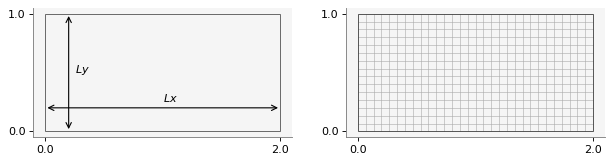

In [5]:
vis = mvis.Plotter(1,2,[dict(aspect='equal'), dict(aspect='equal')], dict(figsize=(8,16)))

vis.draw_domain(1, xg, yg)
vis.plot_mesh2D(2, xg, yg)
vis.plot_frame(2, xg, yg)

**3. Definir las condiciones iniciales y de frontera:**

In [6]:
T = np.zeros((Nx+2, Ny+2))
T[0,:]    = 0  # Pared izquierda    
T[Nx+1,:] = 0   # Pared derecha
T[:,0]    = 0  # Pared inferior
T[:,Ny+1] = 0   # Pared superior
T[int(Nx*0.375):int(Nx*0.625),0] = 20  # Pedazo de la pared inferior en calentamiento

print(T) 

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

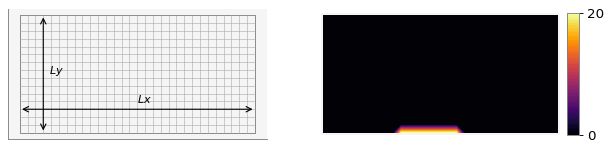

In [7]:
vis = mvis.Plotter(1,2,[dict(aspect='equal'), dict(aspect='equal')], dict(figsize=(8,16)))

vis.draw_domain(1, xg, yg)
vis.plot_mesh2D(1, xg, yg)

cax2 = vis.set_canvas(2,Lx,Ly)
c_T = vis.contourf(2, xg, yg, T, levels=50, cmap='inferno')
vis.fig.colorbar(c_T, cax=cax2, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')

vis.show()

**4. Implementar el algoritmo de solución:**
$$
T_{i,j}^{n+1} = T_{i,j}^n + \dfrac{h_t \kappa}{h^2} 
\left(T_{i+1,j}^n + T_{i-1,j}^n + T_{i,j+1}^n + T_{i,j-1}^n - 4T_{i,j}^n\right) 
$$


In [8]:
ht = 0.001
r = 𝜅 * ht / h**2
T_new = T.copy()
tolerancia = 1.0e-4 #1.0e-3
error = 1.0
error_lista = []
iteracion = 1
while(error > tolerancia):
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            T_new[i,j] = T[i,j] + r * (T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] - 4*T[i,j])
    error = np.linalg.norm(T_new - T)
    error_lista.append(error)
    T[:] = T_new[:]
    print(iteracion, end = ' ')
    iteracion += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

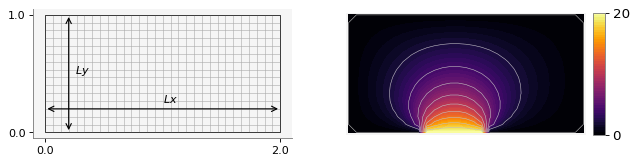

In [9]:
vis = mvis.Plotter(1,2,[dict(aspect='equal'), dict(aspect='equal')], dict(figsize=(8,16)))

vis.draw_domain(1, xg, yg)
vis.plot_mesh2D(1, xg, yg)
vis.plot_frame(1, xg, yg)

cax2 = vis.set_canvas(2,Lx,Ly)
c_T = vis.contourf(2, xg, yg, T, levels=50, cmap='inferno')
vis.fig.colorbar(c_T, cax=cax2, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.contour(2, xg, yg, T, levels=10, colors='silver', linewidths=0.5)

vis.show()

Visualizamos la distribución de temperaturas y el *error* usando varias gráficas:

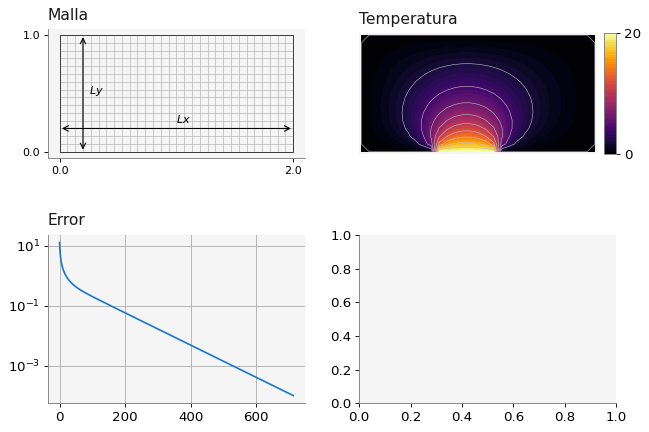

In [10]:
ax1 = dict(aspect='equal', title='Malla')
ax2 = dict(aspect='equal', title='Temperatura')
ax3 = dict(title='Error', yscale='log')

vis = mvis.Plotter(2,2,[ax1, ax2, ax3], dict(figsize=(8,6)))

vis.draw_domain(1, xg, yg)
vis.plot_mesh2D(1, xg, yg)
vis.plot_frame(1, xg, yg)

cax2 = vis.set_canvas(2,Lx,Ly)
c_T = vis.contourf(2, xg, yg, T, levels=50, cmap='inferno')
vis.fig.colorbar(c_T, cax=cax2, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.contour(2, xg, yg, T, levels=10, colors='silver', linewidths=0.5)

vis.plot(3, [i for i in range(len(error_lista))], error_lista)
vis.grid(nlist=[3])
vis.show()

<a name='6'></a>
## Flujo de calor

Fourier también estableció una ley para el flujo de calor que se escribe como:

$$
\vec{q} = -\kappa \nabla T = -\kappa \left(\dfrac{\partial T}{\partial x}, \dfrac{\partial T}{\partial y}\right)
$$

Si usamos diferencias centradas para aproximar esta ecuación obtenemos:

$$
\vec{q}_{i,j} = (qx_{i,j}, qy_{i,j}) = -\dfrac{\kappa}{2h} (T_{i+1,j}-T_{i-1,j}, T_{i,j+1}-T_{i,j-1} )
$$

La implementación de esta fórmula es directa y se muestra en la siguiente celda de código:

In [11]:
qx = np.zeros((Nx+2, Ny+2))
qy = qx.copy()

s = 𝜅 / 2*h
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        qx[i,j] = -s * (T[i+1,j] - T[i-1,j])
        qy[i,j] = -s * (T[i,j+1] - T[i,j-1])

Visualización del flujo:

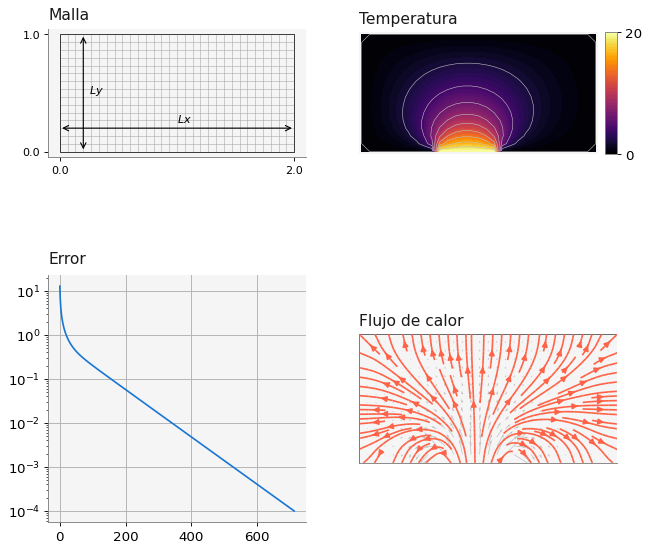

In [12]:
ax1 = dict(aspect='equal', title='Malla')
ax2 = dict(aspect='equal', title='Temperatura')
ax3 = dict(title='Error', yscale='log')
ax4 = dict(aspect='equal', title='Flujo de calor')

vis = mvis.Plotter(2,2,[ax1, ax2, ax3, ax4], dict(figsize=(8,8)))

vis.draw_domain(1, xg, yg)
vis.plot_mesh2D(1, xg, yg)
vis.plot_frame(1, xg, yg)

cax2 = vis.set_canvas(2,Lx,Ly)
c_T = vis.contourf(2, xg, yg, T, levels=50, cmap='inferno')
vis.fig.colorbar(c_T, cax=cax2, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.contour(2, xg, yg, T, levels=10, colors='silver', linewidths=0.5)

vis.plot(3, [i for i in range(len(error_lista))], error_lista)
vis.grid(nlist=[3])

vis.plot_frame(4, xg, yg)
vis.streamplot(4, xg, yg, qx, qy, color = 'tomato')
vis.quiver(4, xg, yg, qx, qy, scale=4, color='silver')

vis.show()

<a name='7'></a>
## Seguimiento de partículas



<div>
 <img src="./Datos/Vectorial.png"  hspace="5" vspace="5" style="float: right;"/>
Si soltamos una partícula en un flujo, dicha partícula seguirá la dirección del flujo y delineará  una trayectoria como se muestra en la siguiente figura. Para calcular los puntos de la trayectoria debemos resolver una ecuación como la siguiente:
    
$$
\dfrac{\partial \vec{x}}{ \partial t} = \vec{v} \qquad \text{con} \qquad \vec{x}(t=0) = \vec{x}_o 
$$
    
donde $\vec{x} = (x,y) $ representa la posición de la partícula y $\vec{v} = (vx, vy)$ su velocidad.
El método más sencillo para encontrar las posiciones de la partícula $\vec{x}_i^{n+1}$, en el instante $n+1$, es conocido como de *Euler hacia adelante* y se escribe como:
    
$$
\vec{x}_i^{n+1} = \vec{x}_i^{n} + h_t * \vec{v}_{i}^n
$$
    
donde $\vec{x}_i^{n}$ representa la posición de la partícula $i$ en el instante $n$, $h_t$ es el paso de tiempo y $\vec{v}_i^n$ es la velocidad de la partícula $i$ en el instante $n$.
 </div>


Escribimos la fórmula de *Euler hacia adelante* en componentes como sigue:

$$
\begin{eqnarray}
x_i^{n+1} & = & x_i^{n} + h_t * vx_{i}^n \\
y_i^{n+1} & = & y_i^{n} + h_t * vy_{i}^n 
\end{eqnarray}
$$

<a name='7-1'></a>
### Algoritmo 2.
Para calcular la trayectoria de una partícula, dentro del flujo de calor, definimos el siguiente algoritmo.

**1. Definimos un punto inicial:**

In [13]:
xo = 0.75
yo = 0.25
print(xo)
print(yo)

0.75
0.25


**2. Definimos los pasos de tiempo a calcular y los arreglos para almacenar las coordenadas de la trayectoria:**

In [14]:
Pasos = 50
xp = np.zeros(Pasos)
yp = np.zeros(Pasos)
xp[0] = xo
yp[0] = yo
print(xp)
print(yp)

[0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


**3. Interpolamos la velocidad en el punto donde está la partícula**:

In [15]:
# Interpolación de la velocidad
def interpolaVel(qx, qy, xpi, ypi, h):
    # localizamos la partícula dentro de la rejilla:
    li = int(xpi/h)
    lj = int(ypi/h)
    return (qx[li,lj], qy[li,lj])

**4. Implementamos el método de Euler hacia adelante**:

In [16]:
ht = 0.2
for n in range(1,Pasos):
    vx, vy = interpolaVel(qx, qy, xp[n-1], yp[n-1], h)
    xp[n] = xp[n-1] + ht * vx
    yp[n] = yp[n-1] + ht * vy

In [17]:
print(xp)
print(yp)

[0.75       0.73267297 0.71623151 0.69979004 0.68334858 0.66690712
 0.65517172 0.64257432 0.62997692 0.61737952 0.60478212 0.59218472
 0.5802528  0.56832088 0.55638896 0.54708219 0.53777543 0.52846867
 0.51988735 0.51130604 0.50272472 0.4941434  0.48556208 0.47698077
 0.46839945 0.45981813 0.452232   0.44464587 0.43705974 0.4294736
 0.42188747 0.41430134 0.40671521 0.39912908 0.39255738 0.38598568
 0.37941398 0.37284229 0.36627059 0.35969889 0.35312719 0.34655549
 0.34076944 0.33498338 0.32919732 0.3240257  0.31885409 0.31368247
 0.30851085 0.30333924]
[0.25       0.2760231  0.29067962 0.30533614 0.31999265 0.33464917
 0.34702799 0.35512954 0.36323109 0.37133264 0.37943419 0.38753574
 0.39202761 0.39651948 0.40101135 0.40639468 0.41177802 0.41716136
 0.4205113  0.42386125 0.4272112  0.43056115 0.43391109 0.43726104
 0.44061099 0.44396093 0.44589069 0.44782044 0.4497502  0.45167995
 0.45360971 0.45553946 0.45746922 0.45939897 0.46041839 0.46143782
 0.46245724 0.46347666 0.46449609 0.465

**5. Graficamos el resultado.**

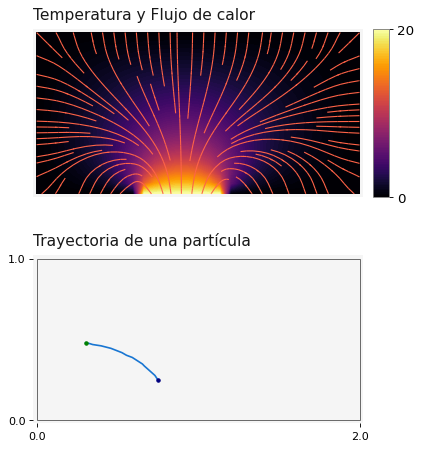

In [18]:
ax1 = dict(aspect='equal', title='Temperatura y Flujo de calor')
ax2 = dict(aspect='equal', title='Trayectoria de una partícula')

vis = mvis.Plotter(2,1,[ax1, ax2], dict(figsize=(8,6)))

cax1 = vis.set_canvas(1,Lx,Ly)
c_T = vis.contourf(1, xg, yg, T, levels=100, cmap='inferno')
vis.fig.colorbar(c_T, cax=cax1, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.streamplot(1, xg, yg, qx, qy, color = 'tomato', linewidth=1.0, arrowstyle='-')

vis.plot_frame(2, xg, yg)
vis.set_canvas(2,Lx,Ly)
vis.plot(2, xp[0], yp[0], marker='.', color ='navy', zorder=5)
vis.plot(2, xp, yp)
vis.plot(2, xp[-1], yp[-1], marker='.', color='g', zorder=5)

vis.show()

<a name='7-2'></a>
### Algoritmo 3.
Dibuja varias trayectorias que inicien en sitios diferentes.

**1. Definimos N posiciones aleatorias**

In [19]:
from time import time
# Transformación lineal
f = lambda x, a, b: (b-a)*x + a 

# Número de partículas
N = 50

# Generación de partículas de manera aleatoria
np.random.seed(int(time()))
coord = np.random.rand(N,2)
coord[:,0] = f(coord[:,0], 0, Lx) # Transformación hacia el dominio de estudio
coord[:,1] = f(coord[:,1], 0, Ly) # Transformación hacia el dominio de estudio

In [20]:
coord

array([[1.80861083, 0.70284332],
       [0.19495729, 0.50500541],
       [0.29961371, 0.25697053],
       [0.05456327, 0.18328638],
       [1.70621773, 0.92613568],
       [0.68387895, 0.96914222],
       [0.33004224, 0.76481451],
       [1.14762037, 0.43546249],
       [1.30818987, 0.93144918],
       [0.76621098, 0.31536117],
       [1.63299987, 0.56981932],
       [0.05095166, 0.28699151],
       [1.83355345, 0.71894018],
       [0.75740415, 0.70825066],
       [0.61753247, 0.97131374],
       [1.14509942, 0.71906824],
       [0.73257979, 0.8497072 ],
       [1.56793562, 0.00572812],
       [1.98044998, 0.37662571],
       [0.04734427, 0.14621247],
       [1.38006639, 0.60165316],
       [0.19054804, 0.98702527],
       [0.08633374, 0.53258502],
       [1.47762183, 0.43874615],
       [1.16836553, 0.99720001],
       [1.11688811, 0.81774946],
       [1.79934133, 0.72075091],
       [1.67107078, 0.99296491],
       [1.71089597, 0.07362231],
       [0.92357449, 0.98310711],
       [0.

**2. Definimos una función para el método de Euler hacia adelante.**

In [21]:
def euler(x, v, h):
    return x + h * v

**3. Definimos los arreglos para almacenar las posiciones de las trayectorias**

In [22]:
# Parámetros para el modelo numérico
Nt = 1000  # Número de pasos en el tiempo
ht = 0.2 # Tamaño del paso de tiempo

# Arreglos para almacenar las N partículas en Nt pasos de tiempo
xn = np.zeros((N,Nt+1))
yn = np.zeros((N,Nt+1))

print('x : {}'.format(xn))
print('y : {}'.format(yn))

x : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**4. Inicializamos la primera posición de las trayectorias.**

In [23]:
# Inicialización
for i in range(0,N):
    xn[i, 0] = coord[i,0]
    yn[i, 0] = coord[i,1]

print('x : {}'.format(xn))
print('y : {}'.format(yn))

x : [[1.80861083 0.         0.         ... 0.         0.         0.        ]
 [0.19495729 0.         0.         ... 0.         0.         0.        ]
 [0.29961371 0.         0.         ... 0.         0.         0.        ]
 ...
 [1.79973185 0.         0.         ... 0.         0.         0.        ]
 [1.30302443 0.         0.         ... 0.         0.         0.        ]
 [0.30321612 0.         0.         ... 0.         0.         0.        ]]
y : [[0.70284332 0.         0.         ... 0.         0.         0.        ]
 [0.50500541 0.         0.         ... 0.         0.         0.        ]
 [0.25697053 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.81160705 0.         0.         ... 0.         0.         0.        ]
 [0.27713148 0.         0.         ... 0.         0.         0.        ]
 [0.6030832  0.         0.         ... 0.         0.         0.        ]]


**5. Para cada posición inicial calculamos una trayectoria.**

In [24]:
for n in range(1,Nt+1):  # Ciclo en el tiempo.
    for i in range(0,N): # Ciclo para cada trayectoria.
        xi = xn[i,n-1]
        yi = yn[i,n-1]
        vx, vy = interpolaVel(qx, qy, xi, yi, h)
        xn[i,n] = euler(xi, vx, ht)
        yn[i,n] = euler(yi, vy, ht)
        
print('x : {}'.format(xn))
print('y : {}'.format(yn))

x : [[1.80861083 1.8104982  1.81238556 ... 2.00088212 2.00088212 2.00088212]
 [0.19495729 0.19068415 0.18641102 ... 0.06622123 0.06622123 0.06622123]
 [0.29961371 0.29408112 0.28854852 ... 0.06619201 0.06619201 0.06619201]
 ...
 [1.79973185 1.80101236 1.80220403 ... 2.00011212 2.00011212 2.00011212]
 [1.30302443 1.31817629 1.33332814 ... 1.66747644 1.66747644 1.66747644]
 [0.30321612 0.29930129 0.29538645 ... 0.06536666 0.06536666 0.06536666]]
y : [[0.70284332 0.70364223 0.70444114 ... 0.76646629 0.76646629 0.76646629]
 [0.50500541 0.50541443 0.50582344 ... 0.51408735 0.51408735 0.51408735]
 [0.25697053 0.25390652 0.25084252 ... 0.12645919 0.12645919 0.12645919]
 ...
 [0.81160705 0.81302338 0.81404905 ... 0.99836718 0.99836718 0.99836718]
 [0.27713148 0.27942968 0.28172788 ... 0.06210498 0.06210498 0.06210498]
 [0.6030832  0.6050664  0.60704961 ... 0.67477277 0.67477277 0.67477277]]


**6. Graficamos el resultado final.**

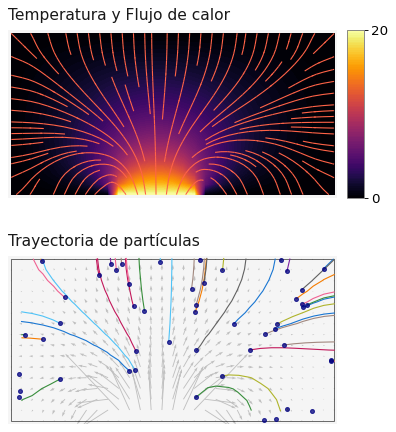

In [25]:
ax1 = dict(aspect='equal', title='Temperatura y Flujo de calor')
ax2 = dict(aspect='equal', title='Trayectoria de partículas')

vis = mvis.Plotter(2,1,[ax1, ax2], dict(figsize=(8,6)))

cax1 = vis.set_canvas(1,Lx,Ly)
c_T = vis.contourf(1, xg, yg, T, levels=100, cmap='inferno')
vis.fig.colorbar(c_T, cax=cax1, ticks = [T.min(), T.max()], shrink=0.5, orientation='vertical')
vis.streamplot(1, xg, yg, qx, qy, color = 'tomato', linewidth=1.0, arrowstyle='-')

vis.plot_frame(2, xg, yg)

vis.set_canvas(2,Lx,Ly)
vis.quiver(2, xg, yg, qx, qy, scale=2, color='silver')

for i in range(0,N):
    vis.scatter(2, xn[i,0], yn[i,0], marker = '.', color='navy', alpha=0.75, s = 50, zorder=5)
    vis.plot(2, xn[i,:], yn[i,:], lw=1.0)

plt.savefig('flujo_calor.pdf')
vis.show()